In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [20]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms', 'floors', 'age']

In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw         X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized  x:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw         X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized  x:[5.85 6.14 2.06 3.69]


In [11]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 112, number of weight updates: 11089.0


In [12]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [109.96 -20.94 -32.35 -38.06], b:[363.17]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [16]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"Prediction using np.dot() amd sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set: \n{y_pred[:4]}")
print(f"Prediction on robot trainig set: \n{y_pred_sgd[:4]}")
print(f"Target values \n{y_train[:4]}")

Prediction using np.dot() amd sgdr.predict match: True
Prediction on training set: 
[295.21 485.89 389.67 492.05]
Prediction on robot trainig set: 
[295.21 485.89 389.67 492.05]
Target values 
[300.  509.8 394.  540. ]


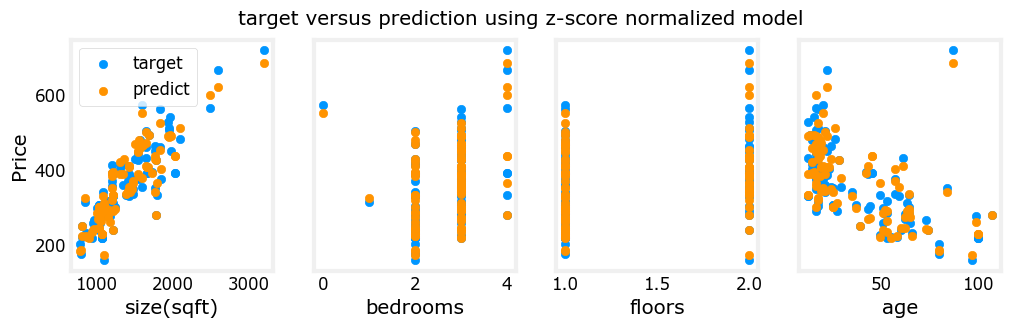

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_pred,color=dlc["dlorange"], label = "predict")
ax[0].set_ylabel("Price");
ax[0].legend();
fig.suptitle("target versus prediction using z - score normalized model")
plt.show()